In [ ]:
# http://scikit-learn.org/stable/auto_examples/datasets/plot_random_dataset.html

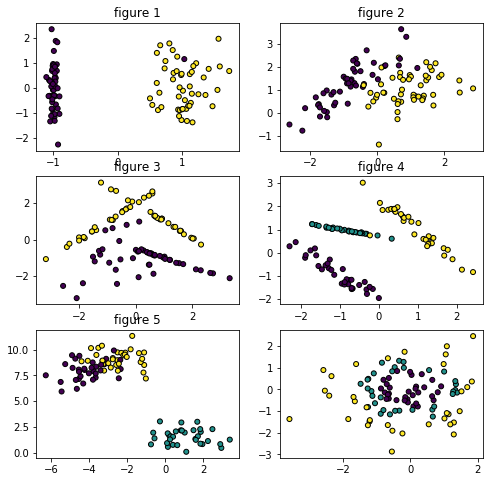

In [23]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles

plt.figure(figsize=(8,8))
plt.subplot(3,2,1)
plt.title("figure 1")
X1,Y1 = make_classification(n_features = 2, n_redundant = 0, n_informative = 1,n_clusters_per_class =1)
plt.scatter(X1[:,0],X1[:,1],marker='o',c=Y1, s=25, edgecolor='k')

plt.subplot(3,2,2)
plt.title("figure 2")
X1,Y1 = make_classification(n_features = 2, n_redundant=0,n_informative =2,n_clusters_per_class=1)
plt.scatter(X1[:,0],X1[:,1],marker='o',c=Y1,s=25,edgecolor='k')

plt.subplot(3,2,3)
plt.title("figure 3")
X1,Y1 = make_classification(n_features = 2, n_redundant=0,n_informative=2)
plt.scatter(X1[:,0],X1[:,1],marker='o',c=Y1,s=25,edgecolor='k')

plt.subplot(3,2,4)
plt.title("figure 4")
X1,Y1 = make_classification(n_features = 2, n_redundant = 0,n_informative=2,
                           n_clusters_per_class=1,n_classes=3)
plt.scatter(X1[:,0],X1[:,1],marker='o',c=Y1,s=25,edgecolor='k')

# very good for classification
plt.subplot(3,2,5)
plt.title("figure 5")
X1,Y1 = make_blobs(n_features = 2,centers=3)
plt.scatter(X1[:,0],X1[:,1],marker = 'o',c=Y1,s=25,edgecolor='k')

#seems good for gaussian mixture model classification
plt.subplot(3,2,6)
X1,Y1 = make_gaussian_quantiles(n_features=2,n_classes=3)
plt.scatter(X1[:,0],X1[:,1],marker='o',c=Y1,s=25,edgecolors='k')

In [32]:
from sklearn import svm
clf = svm.SVC(gamma='scale')
clf.fit(X,y)


TypeError: must be real number, not str

In [ ]:
model persistence

In [ ]:
import pickle
s=pickle.dumps(clf)
clf2 = pickle.load(s)
clf2.predict()


In [10]:
PR curve line plotting
what does it mean: 
                      Condition: A        Not A

  Test says “A”       True positive   |   False positive
                      ----------------------------------
  Test says “Not A”   False negative  |    True negative

SyntaxError: invalid syntax (<ipython-input-10-824616b659f0>, line 1)

In [26]:
a=[1,2,3,4,5]
print(a[-2:])

[4, 5]


In [12]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
import numpy as np

iris = datasets.load_iris()
X = iris.data
y = iris.target

# Add noisy features
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# Limit to the two first classes, and split into training and test
X_train, X_test, y_train, y_test = train_test_split(X[y < 2], y[y < 2],
                                                    test_size=.5,
                                                    random_state=random_state)

# Create a simple classifier
classifier = svm.LinearSVC(random_state=random_state)
classifier.fit(X_train, y_train)
y_score = classifier.decision_function(X_test)


In [15]:
print(y_train, y_test)
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

[0 0 0 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 0 0 1
 1 0 1 0 1 0 0 0 0 0 1 1 1] [1 1 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 1 1 1 1 0 0 0 1 0 1 0 1 0
 0 0 0 1 1 1 1 0 1 1 0 1 0]
Average precision-recall score: 0.88


Text(0.5,1,'2-class Precision-Recall curve: AP=0.88')

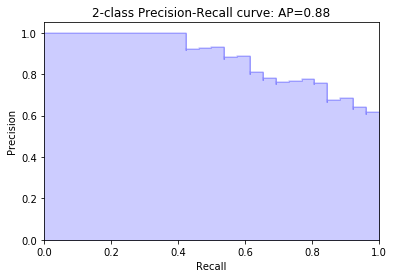

In [16]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature

precision, recall, _ = precision_recall_curve(y_test, y_score)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

In [18]:
print(precision)
print(recall)

[0.61904762 0.6097561  0.625      0.64102564 0.63157895 0.64864865
 0.66666667 0.68571429 0.67647059 0.66666667 0.6875     0.70967742
 0.73333333 0.75862069 0.75       0.77777778 0.76923077 0.76
 0.75       0.7826087  0.77272727 0.80952381 0.8        0.84210526
 0.88888889 0.88235294 0.875      0.93333333 0.92857143 0.92307692
 0.91666667 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.        ]
[1.         0.96153846 0.96153846 0.96153846 0.92307692 0.92307692
 0.92307692 0.92307692 0.88461538 0.84615385 0.84615385 0.84615385
 0.84615385 0.84615385 0.80769231 0.80769231 0.76923077 0.73076923
 0.69230769 0.69230769 0.65384615 0.65384615 0.61538462 0.61538462
 0.61538462 0.57692308 0.53846154 0.53846154 0.5        0.46153846
 0.42307692 0.42307692 0.38461538 0.34615385 0.30769231 0.26923077
 0.23076923 0.19230769 0.15384615 0.11538462 0.07692308 0.03846154
 0.        ]


In [13]:
 
ss = {1:'ssss',100:'fff',33:'dddd'}
ss[3] = 'ssssssss'

for key in sorted(ss.items()):
    print (key)
ss = sorted(ss.items())
print(ss[2][1])

(1, 'ssss')
(3, 'ssssssss')
(33, 'dddd')
(100, 'fff')
dddd


In [5]:
x=range(1,1000,50)
print(x)
print(len(x))

range(1, 1000, 50)
20
